# Credit Card Fraud - EDA & Modeling
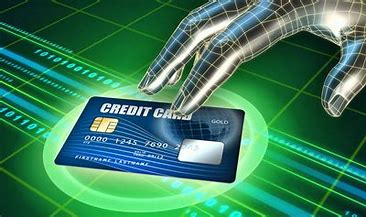

In [43]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [44]:
# read in data
df=pd.read_csv('CreditCardFraud.csv')

## Investigating data

In [45]:
df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,1/1/2019 0:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1/1/2019 0:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,1/1/2019 0:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [46]:
df.shape

(1048575, 23)

In [47]:
print(min(df['trans_date_trans_time'])); print(max(df['trans_date_trans_time']));

1/1/2019 0:00
9/9/2019 9:59


In [48]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cc_num,1048575.0,4.171800e+17,1.308893e+18,6.041621e+10,1.800000e+14,3.520000e+15,4.640000e+15,4.990000e+18
amt,1048378.0,7.028055e+01,1.599551e+02,1.000000e+00,9.650000e+00,4.745000e+01,8.306000e+01,2.894890e+04
zip,1048575.0,4.880159e+04,2.689804e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.978300e+04
lat,1048575.0,3.853336e+01,5.076852e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1048575.0,-9.022626e+01,1.375858e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1048575.0,8.905776e+04,3.024351e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,1048575.0,1.344906e+09,1.019700e+07,1.325376e+09,1.336682e+09,1.344902e+09,1.354366e+09,1.362932e+09
merch_lat,1048575.0,3.853346e+01,5.111233e+00,1.902779e+01,3.472954e+01,3.936295e+01,4.195602e+01,6.751027e+01
merch_long,1048575.0,-9.022648e+01,1.377093e+01,-1.666712e+02,-9.689864e+01,-8.743923e+01,-8.023228e+01,-6.695090e+01
is_fraud,1048575.0,5.727773e-03,7.546503e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1048575 non-null  object 
 1   cc_num                 1048575 non-null  float64
 2   merchant               1048575 non-null  object 
 3   category               1048575 non-null  object 
 4   amt                    1048378 non-null  float64
 5   first                  1048575 non-null  object 
 6   last                   1048575 non-null  object 
 7   gender                 1048575 non-null  object 
 8   street                 1048575 non-null  object 
 9   city                   1048575 non-null  object 
 10  state                  1048575 non-null  object 
 11  zip                    1048575 non-null  int64  
 12  lat                    1048575 non-null  float64
 13  long                   1048575 non-null  float64
 14  city_pop          

In [51]:
# Check if there are duplicated rows
print(df.duplicated().sum())

0


In [52]:
# Check if there are missing values
print(df.isnull().sum())

trans_date_trans_time      0
cc_num                     0
merchant                   0
category                   0
amt                      197
first                      0
last                       0
gender                     0
street                     0
city                       0
state                      0
zip                        0
lat                        0
long                       0
city_pop                   0
job                        0
dob                        0
trans_num                  0
unix_time                  0
merch_lat                  0
merch_long                 0
is_fraud                   0
dtype: int64


In [53]:
# Percentagae amt column missing value
(df['amt'].isnull().sum() / df.shape[0]) * 100

0.018787401950265837

In [54]:
# Replace mssing values of amt using mean of amt
#df ['amt'] = df ['amt'].fillna(df ['amt'].mean()) 
#df['amt'].isnull().sum()

Text(0.5, 1.0, 'BoxPlot of Fraudulent Transaction Amout')

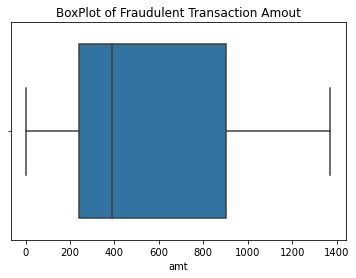

In [55]:
# Transaction amount when transaction is fraud
sns.boxplot(data=df.loc[df['is_fraud']==1], x='amt') 
plt.title ('BoxPlot of Fraudulent Transaction Amout')

In [56]:
# Inversitgae the bottom 10 value of amt in boxplot
df['amt'].nsmallest(n=10)

21768    1.0
22762    1.0
23685    1.0
25146    1.0
34740    1.0
41725    1.0
49569    1.0
52655    1.0
53832    1.0
54942    1.0
Name: amt, dtype: float64

Fraudulent transactions: Q1 is over $200. Q3 is close to $900. The median of the amt is $400. 
It is right skewed,which means that most of data is on the small value side. There is no outlier.

In [57]:
print('Counts: Fraud vs. Non-Fraud')
print(df['is_fraud'].value_counts())
print('Percentages:Fraud vs. Non-Fraud')
print(round(df['is_fraud'].value_counts(normalize=True)*100, 2))

Counts: Fraud vs. Non-Fraud
0    1042569
1       6006
Name: is_fraud, dtype: int64
Percentages:Fraud vs. Non-Fraud
0    99.43
1     0.57
Name: is_fraud, dtype: float64


Text(0.5, 1.0, 'Fraud Percentage')

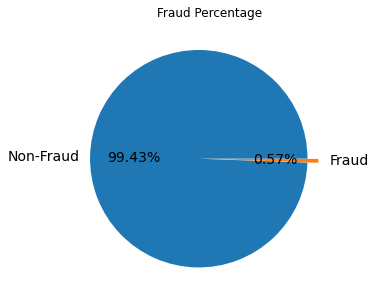

In [58]:
# Percentage of fraud -- pie chart
y=df['is_fraud'].value_counts(normalize=True)
x=np.array(y)
mylabels=["Non-Fraud","Fraud"]
myexplode=[0.1,0]

fig=plt.figure(figsize=(5,5))
plt.pie(x,explode=myexplode,labels=mylabels,autopct='%.2f%%', textprops={'fontsize': 14})
plt.title("Fraud Percentage")

In [59]:
df['is_fraud'].describe()

count    1.048575e+06
mean     5.727773e-03
std      7.546503e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: is_fraud, dtype: float64

In [60]:
# Convert dob and trans_date_trans_time to datetime type
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])
df['trans_date']=df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df['trans_date']=pd.to_datetime(df['trans_date'])
df['dob']=pd.to_datetime(df['dob'])

In [61]:
# Cacluate age on the transaction date
df["age"] = df["trans_date"]-df["dob"]
df["age"] = df["age"].astype('timedelta64[Y]') #unit: year

In [62]:
df.age.describe().round(2)

count    1048575.00
mean          45.39
std           17.38
min           13.00
25%           32.00
50%           43.00
75%           56.00
max           95.00
Name: age, dtype: float64

In [63]:
# Calculate distance from customer location to merchant location 
df['distance'] = np.sqrt((df['merch_lat']-df['lat'])**2 +(df['merch_long']-df['long'])**2)*69.17  #unit: mile

In [64]:
# Drop unnecessary columns
df = df.drop(['unix_time', 'dob', 'merch_lat', 'merch_long', 'lat', 'long'], axis=1)
print(df.columns); print(df.shape)

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'city_pop',
       'job', 'trans_num', 'is_fraud', 'trans_date', 'age', 'distance'],
      dtype='object')
(1048575, 19)


### EDA

In [65]:
# Create hour, weekday, month variables
df['hour']=pd.to_datetime(df['trans_date_trans_time']).dt.hour
df['weekday']=pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek
df['month']=pd.to_datetime(df['trans_date_trans_time']).dt.month

In [66]:
# Define function to produce histogram of hour, weekday, month by is_fraud
def hisplt (nvar, xvar, xlabel, xticklb, pltTitle, fsize=(8,5), data1=df, mp='dodge'):
    '''nvar equals to 1 or 2 or 3. 1-hourly histogram, 2-monthly histogram, 3-weekly histogram'''
    plt.figure(figsize=fsize)
    ax=sns.histplot(data=data1, x=xvar, hue="is_fraud", common_norm=False,stat='percent',multiple=mp)
    ax.set_ylabel('Percentage')
    ax.set_xlabel(xlabel)
    if nvar == 1:
        plt.xticks(np.arange(0,24,1))
        ax.set_xticklabels(xticklb)
    elif nvar == 2:
        plt.xticks(np.arange(1,13,1))
        ax.set_xticklabels(xticklb)
    elif nvar == 3:
        ax.set_xticklabels(xticklb)   
    plt.legend(title='Transaction Type', labels=['Fraud', 'Non-Fraud'])
    plt.title(pltTitle)
    plt.show()

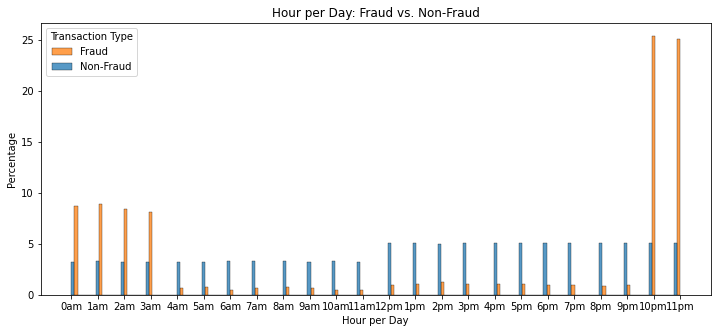

In [67]:
# call the function to generate histogram of hours per day
hisplt(1, df['hour'], 'Hour per Day', ["0am","1am","2am","3am","4am","5am","6am",'7am','8am','9am','10am','11am',
        '12pm','1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm'], 
       'Hour per Day: Fraud vs. Non-Fraud', fsize = (12, 5))

Fraudulent transactions occured more the time when people were normally in deep sleep.

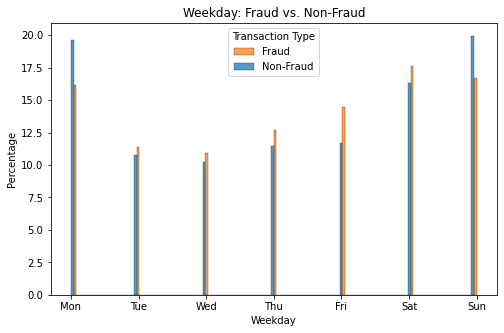

In [68]:
#call the function to generate histogram of weekday
hisplt(3, df['weekday'], 'Weekday', ["", "Mon","Tue","Wed","Thu","Fri","Sat","Sun"], 'Weekday: Fraud vs. Non-Fraud' )

Regardless of being fraud or not, there were more transactions from Saturday to Monday. Need to especially moniotor unusal/suspicious transactions during these weekdays.

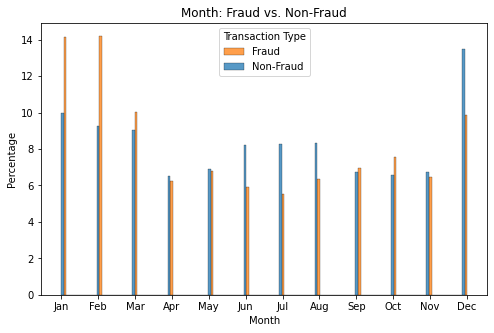

In [69]:
# call the function to generate histogram of month
hisplt(2, df['month'], 'Month', ["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'], 
       'Month: Fraud vs. Non-Fraud' )

Fraudulent transactions occured more in January and February.

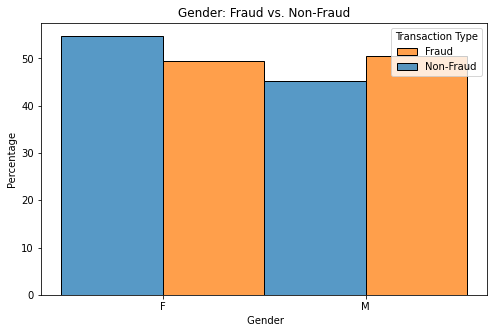

In [70]:
fig=plt.figure(figsize=(8,5))
ax=sns.histplot(data=df, x='gender',hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel(' Gender')
plt.legend(title='Transaction Type',labels=['Fraud','Non-Fraud'])
plt.title('Gender: Fraud vs. Non-Fraud')
plt.show()

percentages
gas_transport     10.149965
grocery_pos        9.527788
home               9.496507
shopping_pos       8.998212
kids_pets          8.716973
shopping_net       7.524402
entertainment      7.246120
food_dining        7.061107
personal_care      7.009322
health_fitness     6.614882
misc_pos           6.150442
misc_net           4.871564
grocery_net        3.501800
travel             3.130916
Name: category, dtype: float64


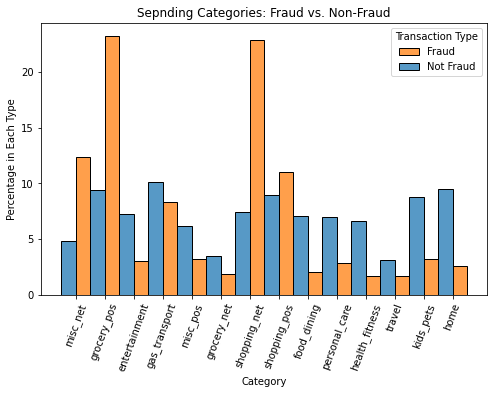

In [71]:
#Sepnding Category vs. is_fraud
print('percentages'); print(df['category'].value_counts(normalize=True)*100)

fig=plt.figure(figsize=(8,5))
ax=sns.histplot(x='category',data=df,hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Category')
for tick in ax.get_xticklabels():
    tick.set_rotation(70)
plt.legend(title='Transaction Type',labels=['Fraud','Not Fraud'])
plt.title('Sepnding Categories: Fraud vs. Non-Fraud')
plt.show()

Fraudulent transactions occured more in grocery_pos and shopping_pos.       

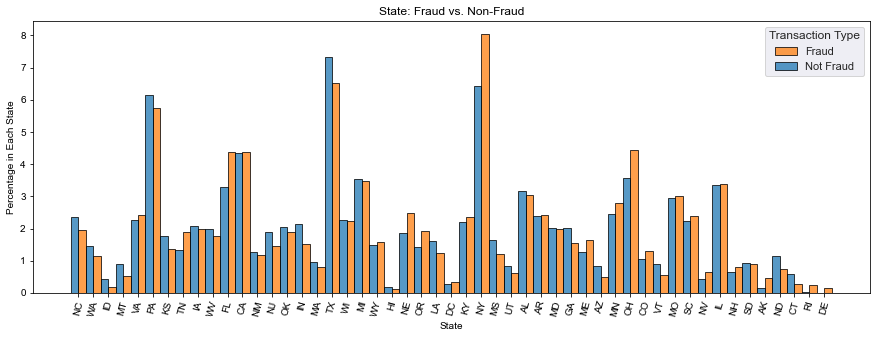

In [72]:
# State vs. is_fraud
#print('percentages'); print(df['state'].value_counts(normalize=True)*100)

fig=plt.figure(figsize=(15,5))
ax=sns.histplot(x='state',data=df,hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
sns.set(rc={'xtick.labelsize':11})
ax.set_ylabel('Percentage in Each State')
ax.set_xlabel('State')
for tick in ax.get_xticklabels():
    tick.set_rotation(75)
plt.legend(title='Transaction Type',labels=['Fraud','Not Fraud'])
plt.title('State: Fraud vs. Non-Fraud')
plt.show()

There were more fraudulent transactions in PA, TX, and NY. Meanwhile, the three states have big population.        

In [73]:
# City vs. Fraud

df['location']=df['city']+','+df['state']  # some state have the same city name
num_cities=df[df["is_fraud"]==1]['location'].nunique()
num_cities

581

In [74]:
# data frame only includes fraudulent transactions
df_fraud=df[df['is_fraud']==1]

In [75]:
# Top 10 cities in fraudulent transactions
#num_cities=df_fraud['location'].nunique()
df_fraud['location'].value_counts().nlargest(n=10)

Naples,FL           29
Dallas,TX           27
Detroit,MI          26
San Antonio,TX      25
Albuquerque,NM      24
Aurora,CO           23
New York City,NY    23
Warren,MI           23
Houston,TX          22
Lakeland,FL         21
Name: location, dtype: int64

In [76]:
# Top 10 Occupations in fraudulent transactions
#num_jobs=df_fraud['job'].nunique()
df_fraud['job'].value_counts().nlargest(n=10)

Materials engineer                       50
Surveyor, land/geomatics                 50
Exhibition designer                      44
Financial trader                         43
Mechanical engineer                      41
Private music teacher                    41
Naval architect                          38
Senior tax professional/tax inspector    37
Television/film/video producer           37
Trading standards officer                37
Name: job, dtype: int64

count    6006.000000
mean       53.050242
std        19.431455
min         0.460533
25%        39.293388
50%        55.187630
75%        67.447413
max        95.810320
Name: distance, dtype: float64


Text(0.5, 1.0, 'Distribution of Fraudulent Transaction Distance from Registration Location')

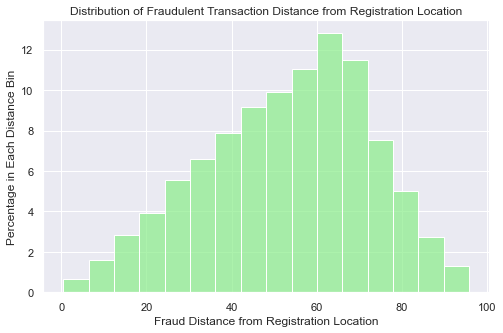

In [77]:
#Fraulent Transactin Distance from Registration Location

print(df_fraud['distance'].describe());

fig=plt.figure(figsize=(8,5))
ax=sns.histplot(data=df_fraud, x='distance', bins=16, stat='percent', color='lightgreen')
ax.set_ylabel('Percentage in Each Distance Bin')
ax.set_xlabel('Fraud Distance from Registration Location')
plt.title('Distribution of Fraudulent Transaction Distance from Registration Location')

Most fraudulent transactions occured around 50 - 70 miles in terms of fraulent transaction distance from registration location

Text(0.5, 1.0, 'Distribution of Age on Fraudulent Transactions')

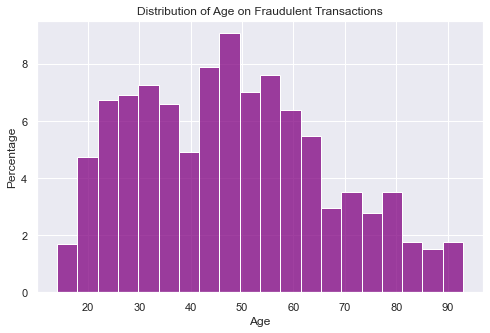

In [78]:
plt.figure(figsize=(8,5))
ax=sns.histplot(data=df_fraud, x="age", bins=20, stat='percent', color='purple')
ax.set_ylabel('Percentage')
ax.set_xlabel('Age')
plt.title('Distribution of Age on Fraudulent Transactions')

Most fraudulent transactions occured 25-35 yrs old and 45-55 yrs old. 

Text(0.5, 1.0, 'Distribution of Fraudulent Transaction Amount')

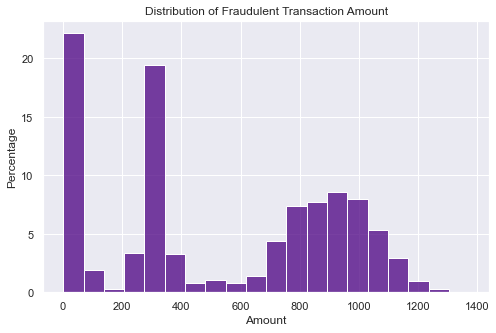

In [79]:
plt.figure(figsize=(8,5))
ax=sns.histplot(data=df_fraud, x="amt", bins=20, stat='percent', color='indigo')
ax.set_ylabel('Percentage')
ax.set_xlabel('Amount')
plt.title('Distribution of Fraudulent Transaction Amount')

In [80]:
df_fraud[df_fraud['amt']<40]['amt'].count()/len(df_fraud)

0.20945720945720947

The highest percentage of fraudulent transaction amount is in low dollar range(e.g., $1 - $40). The second higest perentage of fraudulent transaction amount is around $300. 

In [81]:
# Save Data
#df.to_csv('CreditCardFraud2.csv',index=False)

## Modeling: Logistic Regression & Random Forest Classifier

In [82]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline 

# read in data
#df=pd.read_csv('CreditCardFraud2.csv')

In [83]:
# display columns
print(df.columns);
df.head(3)

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'city_pop',
       'job', 'trans_num', 'is_fraud', 'trans_date', 'age', 'distance', 'hour',
       'weekday', 'month', 'location'],
      dtype='object')


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,trans_num,is_fraud,trans_date,age,distance,hour,weekday,month,location
0,2019-01-01,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",0b242abb623afc578575680df30655b9,0,2019-01-01,30.0,60.373617,0,1,1,"Moravian Falls,NC"
1,2019-01-01,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,1f76529f8574734946361c461b024d99,0,2019-01-01,40.0,18.835686,0,1,1,"Orient,WA"
2,2019-01-01,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,0,2019-01-01,56.0,67.499221,0,1,1,"Malad City,ID"


In [84]:
#drop unnesscary columns for modeling
#df2=df.drop(columns=['trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 
#                     'city',  'zip', 'city_pop','job', 'trans_num', 'trans_date','location'], axis=1)

df2=df.drop(columns=['trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 
                      'city',  'zip', 'trans_num', 'trans_date','location'], axis=1)
df2.columns

Index(['merchant', 'category', 'amt', 'gender', 'state', 'city_pop', 'job',
       'is_fraud', 'age', 'distance', 'hour', 'weekday', 'month'],
      dtype='object')

In [85]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   merchant  1048575 non-null  object 
 1   category  1048575 non-null  object 
 2   amt       1048378 non-null  float64
 3   gender    1048575 non-null  object 
 4   state     1048575 non-null  object 
 5   city_pop  1048575 non-null  int64  
 6   job       1048575 non-null  object 
 7   is_fraud  1048575 non-null  int64  
 8   age       1048575 non-null  float64
 9   distance  1048575 non-null  float64
 10  hour      1048575 non-null  int64  
 11  weekday   1048575 non-null  int64  
 12  month     1048575 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 104.0+ MB


In [86]:
df2.select_dtypes(include=[object]).head()

,merchant,category,gender,state,job
0,"fraud_Rippin, Kub and Mann",misc_net,F,NC,"Psychologist, counselling"
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,F,WA,Special educational needs teacher
2,fraud_Lind-Buckridge,entertainment,M,ID,Nature conservation officer
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,M,MT,Patent attorney
4,fraud_Keeling-Crist,misc_pos,M,VA,Dance movement psychotherapist


In [87]:
### Use LabelEncoder to transform categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in df2[['merchant', 'category', 'gender', 'state', 'job']]:
    df2[i] = le.fit_transform(df2[i])

In [88]:
df2.head()

,merchant,category,amt,gender,state,city_pop,job,is_fraud,age,distance,hour,weekday,month
0,514,8,4.97,0,27,3495,370,0,30.0,60.373617,0,1,1
1,241,4,107.23,0,47,149,428,0,40.0,18.835686,0,1,1
2,390,0,220.11,1,13,4154,307,0,56.0,67.499221,0,1,1
3,360,2,45.00,1,26,1939,328,0,51.0,63.622672,0,1,1
4,297,9,41.96,1,45,99,116,0,32.0,60.074463,0,1,1


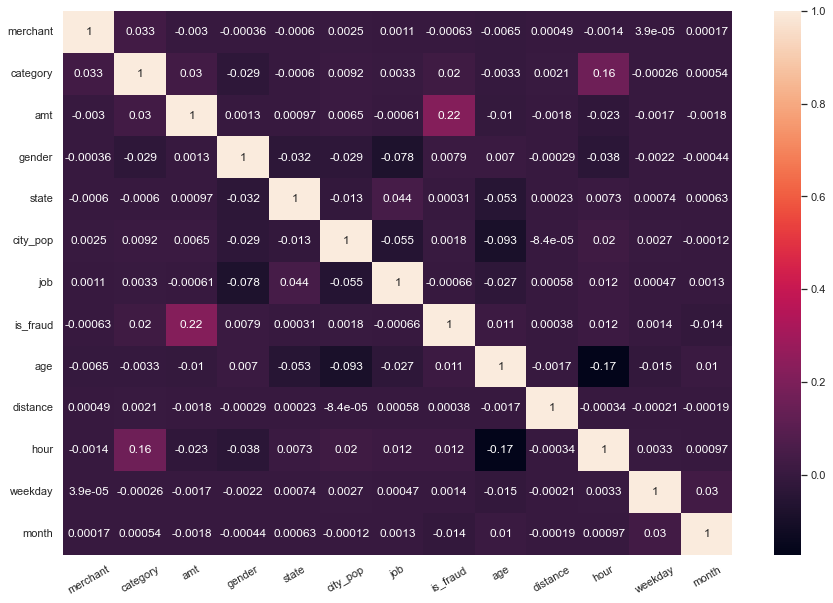

In [89]:
# Correction heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(), annot=True)
plt.xticks(rotation=30)
plt.show()

### logistic regression

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [91]:
# split X and y into training and testing sets for logistic regression
train,test=train_test_split(df2,test_size=0.3,train_size=0.7,random_state=123) 

In [92]:
# missing vlaues
print('Train data:'); print(train.isnull().sum()); 
print('Test data:'); print(test.isnull().sum())

Train data:
merchant      0
category      0
amt         132
gender        0
state         0
city_pop      0
job           0
is_fraud      0
age           0
distance      0
hour          0
weekday       0
month         0
dtype: int64
Test data:
merchant     0
category     0
amt         65
gender       0
state        0
city_pop     0
job          0
is_fraud     0
age          0
distance     0
hour         0
weekday      0
month        0
dtype: int64


In [93]:
#replace missing vlaues
impute_v = train['amt'].mean() 
train['amt']=train['amt'].fillna(impute_v)
test['amt']=test['amt'].fillna(impute_v)

#check if the missing values are replaced
print(train['amt'].isnull().sum()); print(test['amt'].isnull().sum())

0
0


In [94]:
# predictors
predictors = ['category', 'amt', 'age', 'hour', 'month']
X_train = train[predictors].values 
X_test = test[predictors].values
y_train = train['is_fraud'].values  
y_test = test['is_fraud'].values

In [95]:
#train['is_fraud'].unique()

In [96]:
#Oversampling using SMOTE - inbalanced data
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train2, y_train2 = oversample.fit_resample(X_train, y_train)
X_test2, y_test2 = oversample.fit_resample(X_test, y_test)

print('Before oversampling: ', X_train.shape);print('After oversampling: ', X_train2.shape)
print('Before oversampling: ', y_train.shape);print('After oversampling: ', y_train2.shape)

Before oversampling:  (734002, 5)
After oversampling:  (1459574, 5)
Before oversampling:  (734002,)
After oversampling:  (1459574,)


In [97]:
log_model = LogisticRegression(tol=1e-4)  
log_model.fit(X_train2,y_train2)
print(log_model.fit(X_train2, y_train2).coef_)
y_predict_LR = log_model.predict(X_test2) 

[[-0.08431877  0.00767976  0.00297898 -0.01036856 -0.06101774]]


In [98]:
y_predict_LR

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

#### Logistic regression model evaluation
##### Define a class to evaluate model using ROC curve and Confusion Matrix

In [99]:
'''Define a class to evaluate model using ROC curve and Confusion Matrix'''
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
class Model_Evaluation:
    def __init__(self, models):
        self.model = models
  
    # calculate roc_auc and plot ROC curve    
    def roc_auc (self, xTest, yTest, tlt1):        
        ''' tlt1: string, part of graph title
        calculate the ROC_AUC '''
        probs = self.model.predict_proba(xTest)
        preds = probs[:,1]
        fpr, tpr, threshold = metrics.roc_curve(yTest, preds)
        roc_auc = metrics.auc(fpr, tpr).round(5)        
        print('ROC_AUC: ', roc_auc)
        ''' plot ROC curve '''
        plt.figure(figsize=(5,5))
        plt.title('ROC Curve of ' + tlt1)        
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        
    # Plot Confusion Matrix    
    def con_maxtrix (self, yTest, yPredicted, tlt2):
        ''' tlt2: string, part of graph title'''
        confusion_matrix = metrics.confusion_matrix(yTest, yPredicted)
        cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
        cm.plot()              
        plt.title('Confusion Maxtrix of ' + tlt2)
        plt.show()       
        '''calculate Accuracy'''
        Accuracy = metrics.accuracy_score(yTest, yPredicted).round(5)        
        print('Accuracy of the model: ', Accuracy)
        '''calculate Precision'''
        Precision = metrics.precision_score(yTest, yPredicted).round(5)        
        print('what percentage is truly positive? ', Precision)
        #return Precision

**Assess the model**

ROC_AUC:  0.86029


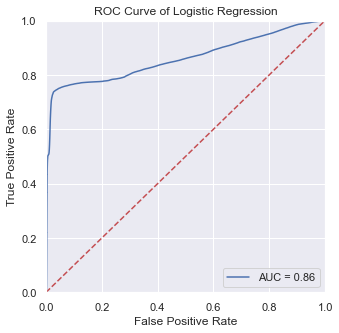

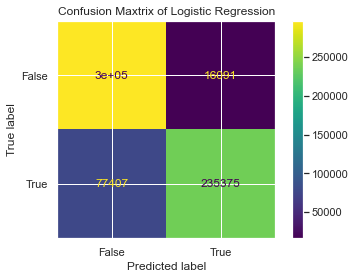

Accuracy of the model:  0.85054
what percentage is truly positive?  0.93601


In [100]:
EvalModel1 = Model_Evaluation(log_model)
EvalModel1.roc_auc(X_test2, y_test2, 'Logistic Regression')
EvalModel1.con_maxtrix(y_test2, y_predict_LR, 'Logistic Regression')

AUC score is interpreted as the probability that the model will assign a larger probability to a random positive observation than a random negative observation. More simplistically, AUC score can be interpreted as the model’s ability to accurately classify classes on a scale from 0 to 1, where 1 is best and 0.5 is as good as random choice.

*AUC score = 0.5 : As good as random choice* <br>
*AUC score in (0.5 - 0.7) : OK performance* <br>
*AUC score in (0.7 - 0.8) : Good performance* <br>
*UC score > 0.8 : Very good performance* <br>

### Random Forest Classifier

**Use accuracy scores to determine the optimal n_estimators for random forest classifier**

In [102]:
#Set n_estimators to a higher value.
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20, max_depth=4, n_jobs=-1)
rf.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=4, n_estimators=20, n_jobs=-1)

In [103]:
#Get predictions for each tree in Random Forest separately
predictions = []
for tree in rf.estimators_:
    predictions.append(tree.predict_proba(X_test2)[None, :])

In [104]:
#Concatenate the predictions 
predictions = np.vstack(predictions)

In [105]:
#Сompute cumulative average of the predictions
cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]

In [106]:
#Get accuracy scores for each n_estimators value
from sklearn.metrics import accuracy_score
scores = []
for pred in cum_mean:
    scores.append(accuracy_score(y_test2, np.argmax(pred, axis=1)))

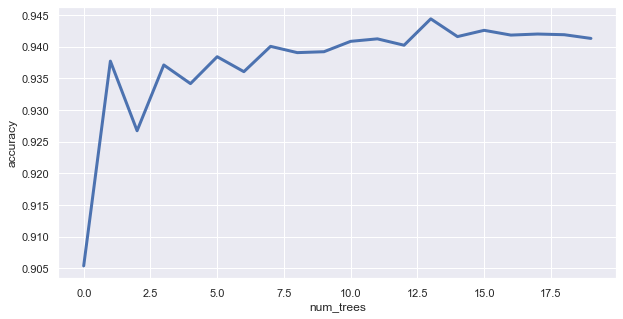

In [107]:
#Plot the scores to determine the optimal n_estimators
plt.figure(figsize=(10, 5))
plt.plot(scores, linewidth=3)
plt.xlabel('num_trees')
plt.ylabel('accuracy');


The optimal n_estimators is 13 based on the graph above.

**Build the model**

In [108]:
RanFor_model = RandomForestClassifier(n_estimators=13, random_state=12)
RanFor_model.fit(X_train2,y_train2)

RandomForestClassifier(n_estimators=13, random_state=12)

In [109]:
y_predict_RF=RanFor_model.predict(X_test2)

In [110]:
y_predict_RF

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

**Assess the model**

ROC_AUC:  0.99629


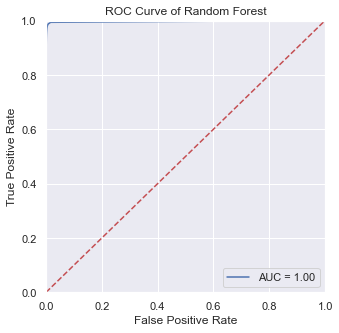

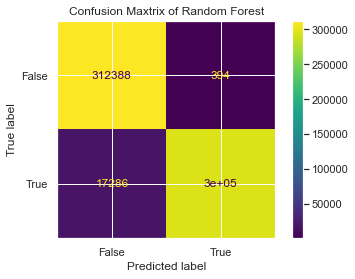

Accuracy of the model:  0.97174
what percentage is truly positive?  0.99867


In [111]:
EvalModel2 = Model_Evaluation(RanFor_model)
EvalModel2.roc_auc(X_test2, y_test2, 'Random Forest')
EvalModel2.con_maxtrix(y_test2, y_predict_RF, 'Random Forest')